Selecting OpenCL device: Apple M1 Pro
OpenCL run time: 141.45ms; mean: 79.30ms; std: 68.89ms; runs: 9
Threaded run time: 32.60ms; mean: 48.87ms; std: 23.08ms; runs: 9
Threaded_static run time: 32.80ms; mean: 46.36ms; std: 16.61ms; runs: 9
Threaded_dynamic run time: 34.42ms; mean: 48.56ms; std: 27.14ms; runs: 9
Threaded_guided run time: 33.63ms; mean: 51.26ms; std: 24.43ms; runs: 9
Unthreaded run time: 57.22ms; mean: 129.76ms; std: 106.53ms; runs: 9
Python run time: 17.06s; mean: 25.22s; std: 15.08s; runs: 7
Numba run time: 21.89ms; mean: 124.53ms; std: 173.00ms; runs: 7
Fastest run type: Numba
Slowest run type: Python
Numba is 1.49 faster than Threaded
Numba is 1.50 faster than Threaded_static
Numba is 1.54 faster than Threaded_guided
Numba is 1.57 faster than Threaded_dynamic
Numba is 2.61 faster than Unthreaded
Numba is 6.46 faster than OpenCL
Numba is 779.55 faster than Python
Threaded is 1.01 faster than Threaded_static
Threaded is 1.03 faster than Threaded_guided
Threaded is 1.06 

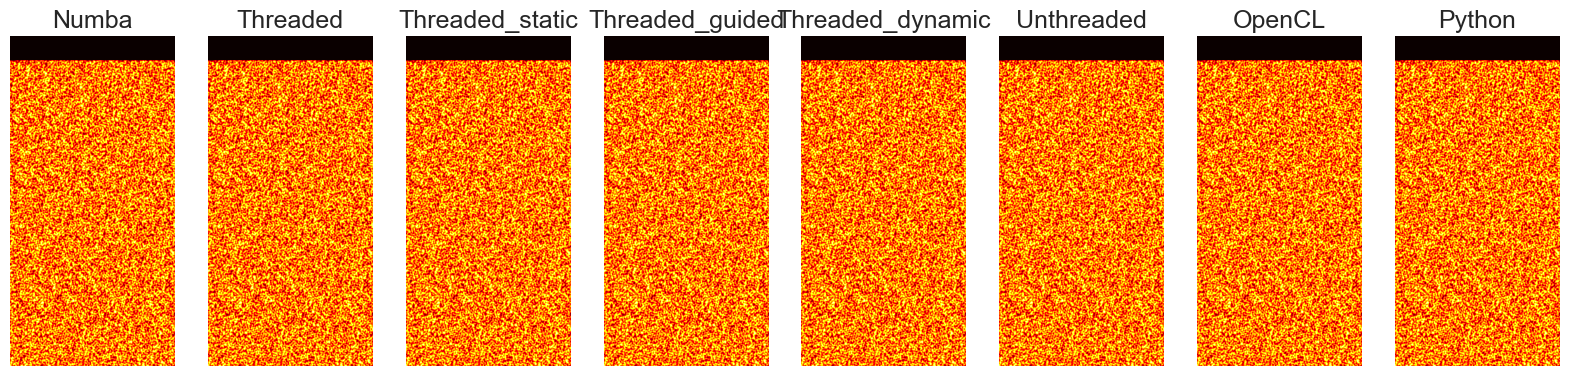

In [1]:
from nanopyx.liquid._le_interpolation_nearest_neighbor import ShiftAndMagnify
from nanopyx.core.generate.noise_add_simplex import get_simplex_noise
from nanopyx.core.transform.binning import rebin_2d

M = 21
# downloader = ExampleDataManager()
# z = downloader.get_ZipTiffIterator('SMLMS2013_HDTubulinAlexa647')
#image = z[0]

image = get_simplex_noise(64*M, 32*M, amplitude=1000)
imageDownsampled = rebin_2d(image, M, mode="mean")

SM = ShiftAndMagnify()
bench_values = SM.benchmark(image, 100, 0, 4, 4)

images = []
titles = []
run_times = [] 

# unzip the values
for run_time, title, image in bench_values:
    run_times.append(run_time)
    titles.append(title)
    images.append(image[0,:,:])
    
# show images in seaborn
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_context("talk")
fig, axes = plt.subplots(1, len(images), figsize=(20, 10))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap="hot")
    ax.set_title(titles[i])
    ax.axis("off")
plt.show()


In [ ]:
import numpy as np
images_together = np.array(images, dtype=np.float32)

# show mean, std and max of images
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(images_together.mean(axis=0), cmap="hot")
ax[0].set_title("Mean")
ax[0].axis("off")
ax[1].imshow(images_together.std(axis=0), cmap="hot")
ax[1].set_title("Std")
ax[1].axis("off")
plt.show()

In [ ]:
import numpy as np

image = np.repeat(get_simplex_noise(512, 512, amplitude=1000)[np.newaxis,:, :], 3, axis=0)

SM = ShiftAndMagnify()
bench_values = SM.benchmark(image, 5, -5, 4, 4)

images = []
titles = []
run_times = [] 

# unzip the values
for run_time, title, image in bench_values:
    run_times.append(run_time)
    titles.append(title)
    images.append(image)
    
# show images in seaborn
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_context("talk")
fig, axes = plt.subplots(1, len(images), figsize=(20, 10))
for i, ax in enumerate(axes):
    ax.imshow(images[i][-1], cmap="hot")
    ax.set_title(titles[i])
    ax.axis("off")
plt.show()


In [ ]:
from nanopyx.core.generate.noise_add_simplex import get_simplex_noise
from nanopyx.liquid._le_interpolation_nearest_neighbor import ShiftScaleRotate
import numpy as np

image = np.repeat(get_simplex_noise(512, 512, amplitude=1000)[np.newaxis,:, :], 3, axis=0)

SM = ShiftScaleRotate()
bench_values = SM.benchmark(image, 100, 0, 1, 1, np.pi/4)

images = []
titles = []
run_times = [] 

# unzip the values
for run_time, title, image in bench_values:
    run_times.append(run_time)
    titles.append(title)
    images.append(image)
    
# show images in seaborn
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_context("talk")
fig, axes = plt.subplots(1, len(images), figsize=(20, 10))
for i, ax in enumerate(axes):
    ax.imshow(images[i][-1], cmap="hot")
    ax.set_title(titles[i])
    ax.axis("off")
plt.show()